In [117]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [118]:
messi = cv2.imread('messi.png',0)
obama = cv2.imread('obama.jpeg',0)
barcelona = cv2.imread('barcelona.png',0)


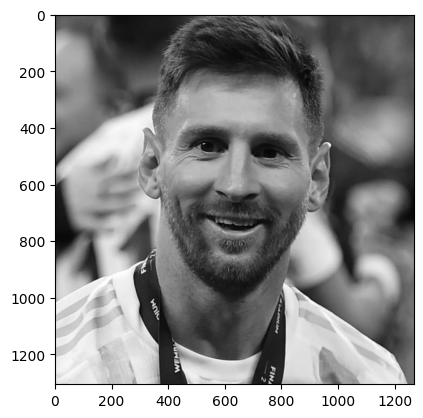

In [119]:
plt.imshow(messi,cmap='gray')

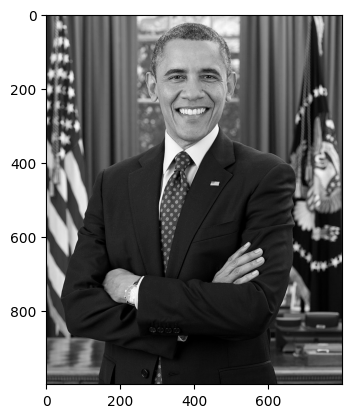

In [120]:
plt.imshow(obama,cmap='gray')

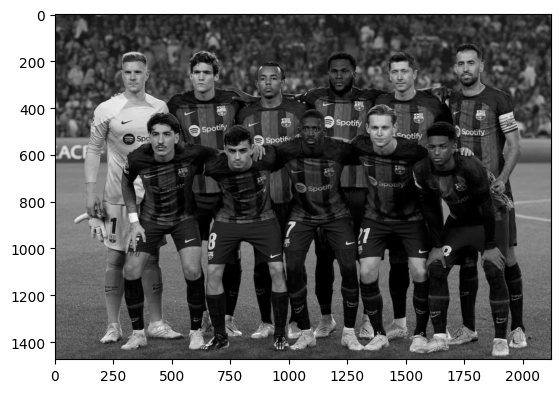

In [121]:
plt.imshow(barcelona,cmap='gray')

In [122]:
# Cascade files 

face_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")


In [123]:
def detectar_cara(img):
    cara = img.copy()

    face_rect = face_cascade.detectMultiScale(cara)
    
    for (x,y,w,h) in face_rect:
        cv2.rectangle(cara,(x,y),(x+w,y+h), (255,255,255), 10)

    return cara

In [124]:
resultado = detectar_cara(messi)

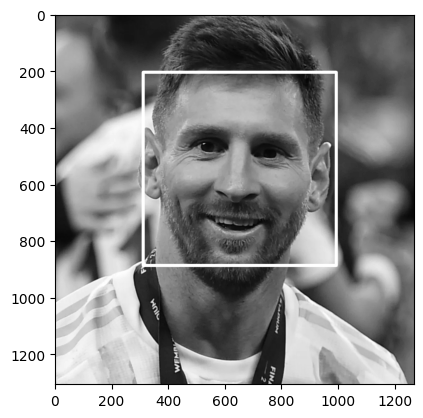

In [125]:
plt.imshow(resultado,cmap='gray')

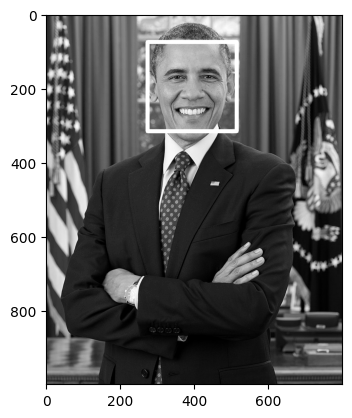

In [126]:
resultado = detectar_cara(obama)
plt.imshow(resultado,cmap='gray')

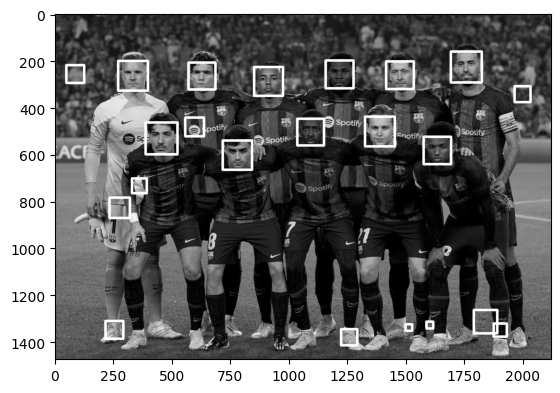

In [127]:
resultado = detectar_cara(barcelona)
plt.imshow(resultado,cmap='gray')

In [128]:
def detectar_cara_ajustado(img):
    cara = img.copy()

    face_rect = face_cascade.detectMultiScale(cara, scaleFactor=1.1, minNeighbors=15)
    
    for (x, y, w, h) in face_rect:
        cv2.rectangle(cara, (x, y), (x + w, y + h), (255, 255, 255), 10)

    return cara



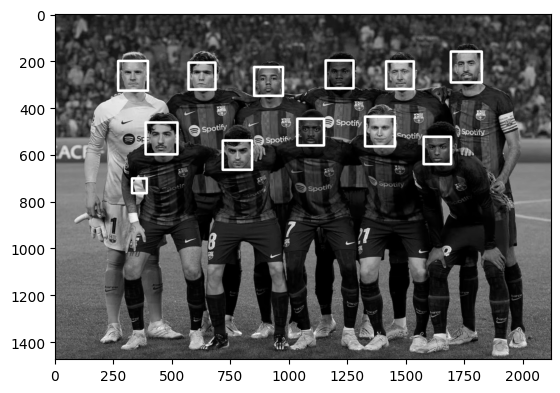

In [129]:
resultado = detectar_cara_ajustado(barcelona)
plt.imshow(resultado,cmap='gray')

In [130]:
# cascada para los ojos
eyes_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_eye.xml")


In [131]:
def detectar_ojos(img):
    cara = img.copy()

    # Ajustar los parámetros de detectMultiScale
    eyes_rect = eyes_cascade.detectMultiScale(cara, scaleFactor=1.1, minNeighbors=15, minSize=(30, 30))
    
    for (x, y, w, h) in eyes_rect:
        cv2.rectangle(cara, (x, y), (x + w, y + h), (255, 255, 255), 10)
    
    return cara


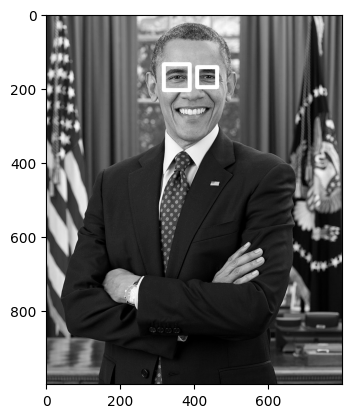

In [132]:
resultado = detectar_ojos(obama)
plt.imshow(resultado,cmap='gray')

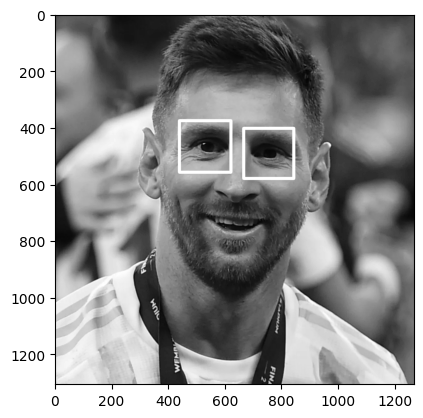

In [133]:
resultado = detectar_ojos(messi)
plt.imshow(resultado,cmap='gray')

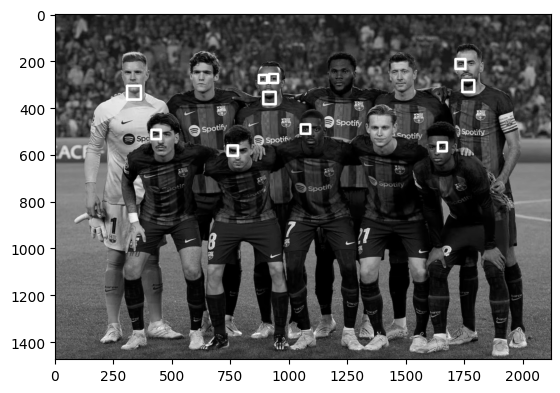

In [134]:
resultado = detectar_ojos(barcelona)
plt.imshow(resultado,cmap='gray')

In [139]:
# Webcam

cap = cv2.VideoCapture(0)

while True:
    ret, frame  = cap.read(0)
    frame =detectar_ojos(frame)

    cv2.imshow('Detectar cara', frame)

    c = cv2.waitKey(1)
    if c == 27:
        break


cap.release()
cv2.destroyAllWindows()